## Final Project Submission

Please fill out:
* Student name: Morgan Amwai
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# <span style='color:#2E86C1'>MOVIE STUDIO ANALYSIS</span>

Your company has noticed a trend that many big companies are into the idea of making their own movies. They want to ba apart of it and have decided to start a movie studio, however they lack the expirience in film production. Your objective is to investigate which films are profitable in the box office and use the information to advice the studio on which films to produce.


## Objectives
* To determine the best performing Genres based on various aspects ie. rating, profit, production cost and ROI
* To analyze amount of revenue generated by each genres
* To analyze market patterns and provide insights to support profitable film production

# Data Understanding

  **Box Office Mojo**: It is used to track box office revenue and performance of movie.

  **The Numbers**: It offers data and analysis on movie box office earnings, production budgets, and related financial aspects.

  **IMDB**: It serves as a comprehensive database for movie, TV, and celebrity inform

In [82]:
# import libraries 
import pandas as pd 
import numpy as np
from scipy import stats
from numbers import Number
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


<h2><b><span style='font-family:Georgia'> Loading the first Dataset </span></b></h2> 

In [83]:
bom_movie = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


* Check for datatypes and column names

In [84]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


* Summary of columns

In [85]:
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


* Checking the number of missing values

In [86]:
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

* Check the data type of each column

In [87]:
bom_movie.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

## Calculating the median

In [88]:
bom_median = bom_movie['domestic_gross'].median()
print('The median is: ', bom_median)

The median is:  1400000.0


* Impute the missing value by using the median

In [89]:
bom_movie['domestic_gross'].fillna(bom_median,inplace=True)

* Checking for missing values

In [90]:
bom_movie.isna().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

* Filling in the missing values 

In [91]:
bom_movie['studio'].fillna('unk', inplace= True)

In [92]:
bom_movie.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [93]:
bom_movie['foreign_gross'].fillna('unk',inplace=True)

In [94]:
bom_movie.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [95]:
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<h2><b><span style='font-family:Georgia'>Loading the Second Dataset </span></b></h2>

In [96]:
tn_movie = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


* Check for datatypes and column names

In [97]:
tn_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [98]:
tn_movie.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


* Checking for null values

In [99]:
tn_movie.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

<h2><b><span style='font-family:Georgia'>Data cleaning </span></b></h2>

* Renaming the column movie

In [100]:
tn_movie = tn_movie.rename(columns = {"movie": "title"})

* Checking for the new columns

In [101]:
tn_movie.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

* Split the string into month, date and year

In [102]:
tn_movie['release_date'].str.split(',',n = 2,expand = True)

,0,1
0,Dec 18,2009
1,May 20,2011
2,Jun 7,2019
3,May 1,2015
4,Dec 15,2017
...,...,...
5777,Dec 31,2018
5778,Apr 2,1999
5779,Jul 13,2005
5780,Sep 29,2015


* Creating new columns for the month and year

In [103]:
tn_movie['release_date'].str.split(',',n = 2,expand = True).rename(columns = {0:'month_date',1:'year'})

,month_date,year
0,Dec 18,2009
1,May 20,2011
2,Jun 7,2019
3,May 1,2015
4,Dec 15,2017
...,...,...
5777,Dec 31,2018
5778,Apr 2,1999
5779,Jul 13,2005
5780,Sep 29,2015


In [104]:
tn_movie[['month_date','year']]=tn_movie['release_date'].str.split(',',n=2,expand = True)
tn_movie

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec 18,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May 20,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun 7,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May 1,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec 15,2017
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Dec 31,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Apr 2,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Jul 13,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Sep 29,2015


<h2><b><span style='font-family:Georgia'>Merging the two data sets tn_movie and bom_movie</span></b></h2>

In [105]:
tn_bom = pd.merge(tn_movie, bom_movie, on = 'title', how = 'left')
tn_bom

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,month_date,year_x,studio,domestic_gross_y,foreign_gross,year_y
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec 18,2009,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May 20,2011,BV,241100000.0,804600000,2011.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun 7,2019,NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May 1,2015,BV,459000000.0,946400000,2015.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec 15,2017,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Dec 31,2018,NaN,NaN,NaN,NaN
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Apr 2,1999,NaN,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Jul 13,2005,NaN,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Sep 29,2015,NaN,NaN,NaN,NaN


* Dropping colums that are repeated

In [106]:
tn_bom = tn_bom.drop(['domestic_gross_y', 'year_y'], axis = 1)
tn_bom


,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,month_date,year_x,studio,foreign_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec 18,2009,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May 20,2011,BV,804600000
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun 7,2019,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May 1,2015,BV,946400000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec 15,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Dec 31,2018,NaN,NaN
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Apr 2,1999,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Jul 13,2005,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Sep 29,2015,NaN,NaN


* Dropping colums that are not needed

In [107]:
tn_bom.rename(columns = {
    'domestic_gross_x': 'domestic_gross',
    'year_x': 'year'
}, inplace = True)
tn_bom

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year,studio,foreign_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec 18,2009,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May 20,2011,BV,804600000
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun 7,2019,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May 1,2015,BV,946400000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec 15,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,Dec 31,2018,NaN,NaN
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",Apr 2,1999,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",Jul 13,2005,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,Sep 29,2015,NaN,NaN


* Convert column's to float

In [108]:
tn_bom['production_budget'] = tn_bom['production_budget'].replace('[$,]', '', regex=True).astype(float)
tn_bom

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year,studio,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625","$2,776,345,279",Dec 18,2009,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875","$1,045,663,875",May 20,2011,BV,804600000
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350","$149,762,350",Jun 7,2019,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868","$1,403,013,963",May 1,2015,BV,946400000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382","$1,316,721,747",Dec 15,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,$0,$0,Dec 31,2018,NaN,NaN
5778,79,"Apr 2, 1999",Following,6000.0,"$48,482","$240,495",Apr 2,1999,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338","$1,338",Jul 13,2005,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,$0,$0,Sep 29,2015,NaN,NaN


In [109]:
tn_bom['domestic_gross'] = tn_bom['domestic_gross'].replace('[$,]', '', regex = True).astype(float)
tn_bom

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year,studio,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,"$2,776,345,279",Dec 18,2009,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875",May 20,2011,BV,804600000
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,"$149,762,350",Jun 7,2019,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963",May 1,2015,BV,946400000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,"$1,316,721,747",Dec 15,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,$0,Dec 31,2018,NaN,NaN
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,"$240,495",Apr 2,1999,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,"$1,338",Jul 13,2005,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,$0,Sep 29,2015,NaN,NaN


In [110]:
tn_bom['worldwide_gross'] = tn_bom['worldwide_gross'].replace('[$,]', '', regex = True).astype(float)
tn_bom

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year,studio,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Dec 18,2009,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May 20,2011,BV,804600000
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Jun 7,2019,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May 1,2015,BV,946400000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,Dec 15,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,Dec 31,2018,NaN,NaN
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,Apr 2,1999,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,Jul 13,2005,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,Sep 29,2015,NaN,NaN


In [111]:
tn_bom['foreign_gross'] = tn_bom['foreign_gross'].replace('[$,]', '', regex = True).replace('unk', np.nan) .astype(float)
tn_bom

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year,studio,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Dec 18,2009,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May 20,2011,BV,804600000.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Jun 7,2019,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May 1,2015,BV,946400000.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,Dec 15,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,Dec 31,2018,NaN,NaN
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,Apr 2,1999,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,Jul 13,2005,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,Sep 29,2015,NaN,NaN


In [112]:
tn_bom['foreign_gross'] = tn_bom ['foreign_gross'].fillna('UNK')
tn_bom

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year,studio,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Dec 18,2009,NaN,UNK
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May 20,2011,BV,804600000.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Jun 7,2019,NaN,UNK
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May 1,2015,BV,946400000.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,Dec 15,2017,NaN,UNK
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,Dec 31,2018,NaN,UNK
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,Apr 2,1999,NaN,UNK
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,Jul 13,2005,NaN,UNK
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,Sep 29,2015,NaN,UNK


* Checking the number of missing values

In [113]:
tn_bom.isnull().sum()

id                      0
release_date            0
title                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
month_date              0
year                    0
studio               4535
foreign_gross           0
dtype: int64

* We fill missing values in the production_budget column using the median

In [114]:
tn_bom.loc[:,'production_budget'] = tn_bom["production_budget"].fillna(tn_bom["production_budget"].median())
tn_bom

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year,studio,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Dec 18,2009,NaN,UNK
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May 20,2011,BV,804600000.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Jun 7,2019,NaN,UNK
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May 1,2015,BV,946400000.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,Dec 15,2017,NaN,UNK
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,Dec 31,2018,NaN,UNK
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,Apr 2,1999,NaN,UNK
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,Jul 13,2005,NaN,UNK
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,Sep 29,2015,NaN,UNK


* Creating a new column for profit

In [115]:
tn_bom['profit'] = tn_bom['worldwide_gross'] - tn_bom['production_budget']
tn_bom.head(5)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year,studio,foreign_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Dec 18,2009,NaN,UNK,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May 20,2011,BV,804600000.0,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Jun 7,2019,NaN,UNK,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May 1,2015,BV,946400000.0,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,Dec 15,2017,NaN,UNK,9.997217e+08


* Creating a new column for foreign gross

In [116]:
tn_bom['foreign_gross'] = tn_bom['worldwide_gross']-tn_bom['domestic_gross']
tn_bom.head(5)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,month_date,year,studio,foreign_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,Dec 18,2009,NaN,2.015838e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,May 20,2011,BV,8.046000e+08,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,Jun 7,2019,NaN,1.070000e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,May 1,2015,BV,9.440081e+08,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,Dec 15,2017,NaN,6.965404e+08,9.997217e+08


* Check the number of rows and columns the dataset has.

In [117]:
tn_bom.shape

(5782, 11)

* Calculate Gross

In [118]:
tn_bom['worldwide_gross'] = tn_bom['domestic_gross'] + tn_bom['foreign_gross']

* Calculate Profit

In [119]:
tn_bom['profit'] = tn_bom['worldwide_gross'] - tn_bom['production_budget']

* Calculate Return On Investment(ROI)

In [120]:
tn_bom['roi'] = tn_bom['profit'] / tn_bom['production_budget']

* Replace ROI values with NaN 

In [121]:
tn_bom['roi'].replace([np.inf, -np.inf], np.nan, inplace = True)

* Dropping the rows with NaN values

In [122]:
roi_cleaned = tn_bom.dropna(subset = ['roi'])

### Adding the a third data set Dataset
fter analyzing the first two data set's, i came to the conclusion that critical information that is needed for instanceke movie genres, ratings and runtimesthis will be helpful for understanding what makes a movie is succesful
To improve our analysis and give better suggestions, I introduced a third data set.ons.

In [123]:

conn = sqlite3.connect(r"C:\Users\user\Documents\top-box-office-films-analysis-d78b517cc2f604f13e5d0d5341c36c30505a877c\top-box-office-films-analysis-d78b517cc2f604f13e5d0d5341c36c30505a877c\ZippedData\im\im.db")


In [124]:
pd.read_sql("""
    SELECT name
    FROM sqlite_master
    WHERE type = 'table';
""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [125]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)

In [126]:
imdb_df = pd.merge(movie_basics, movie_ratings, on="movie_id")

In [127]:
imdb_df.dropna(subset=["primary_title", "start_year", "runtime_minutes", "genres", "averagerating"], inplace=True)
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


* Convert column's to float

In [128]:
imdb_df["start_year"] = imdb_df["start_year"].astype(int)

In [129]:
imdb_df["runtime_minutes"] = imdb_df["runtime_minutes"].astype(int)
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98,"Drama,Family",8.7,136


* Extracting Main Genre

In [130]:
imdb_df["main_genre"] = imdb_df["genres"].apply(lambda x: x.split(",")[0] if "," in x else x)
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,main_genre
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77,Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",7.2,43,Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,6.9,4517,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6.5,119,Comedy
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83,"Adventure,Animation,Comedy",8.1,263,Adventure
...,...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130,Drama,8.4,365,Drama
73850,tt9913056,Swarm Season,Swarm Season,2019,86,Documentary,6.2,5,Documentary
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75,Documentary,6.2,6,Documentary
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98,"Drama,Family",8.7,136,Drama


<h3><b><span style='font-family:Georgia'>Joining the data sets </span></b></h3

In [131]:
print('tn_bom titles:', tn_bom['title'].head())
print('imdb_df titles:', imdb_df['primary_title'].head())

tn_bom titles: 0                                         Avatar
1    Pirates of the Caribbean: On Stranger Tides
2                                   Dark Phoenix
3                        Avengers: Age of Ultron
4              Star Wars Ep. VIII: The Last Jedi
Name: title, dtype: object
imdb_df titles: 0                          Sunghursh
1    One Day Before the Rainy Season
2         The Other Side of the Wind
4           The Wandering Soap Opera
6                    Joe Finds Grace
Name: primary_title, dtype: object


* Cleaning movie titles 

In [132]:
tn_bom['movie_clean'] = tn_bom['title'].str.strip().str.lower()
imdb_df['title_clean'] = imdb_df['primary_title'].str.strip().str.lower()

movie_df = pd.merge(tn_bom, imdb_df, left_on="movie_clean", right_on="title_clean", how="inner")
movie_df.head()

 <h2><b><span style='font-family:Georgia'>Exploratory Data Analysis (EDA)</span></b></h2>

<h3><b><span style='font-family:Georgia'>Univariate Analysis</span></b></h3

* Counting gener and plotting a pie chart

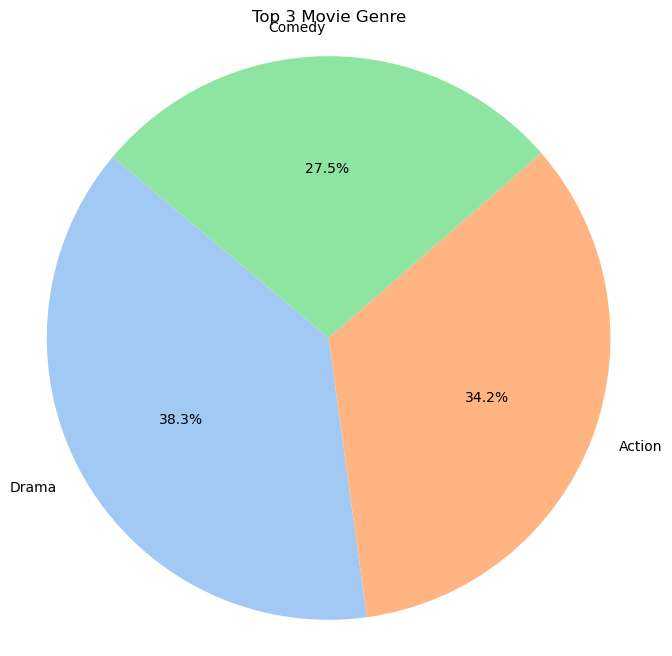

In [165]:
genre_counts = movie_df['main_genre'].value_counts().nlargest(3)  
plt.figure(figsize = (8, 8))
plt.pie(genre_counts, labels = genre_counts.index, autopct = "%1.1f%%", startangle = 140, colors = sns.color_palette('pastel'))
plt.title('Top 3 Movie Genre')
plt.axis('equal')
plt.show()

* Genre Distribution

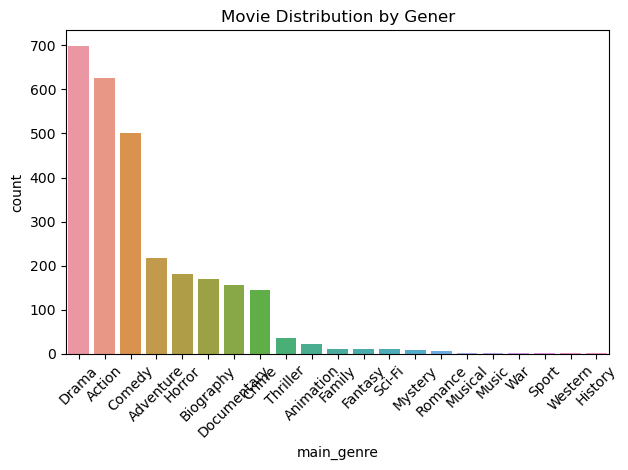

In [135]:
sns.countplot(data = movie_df, x = 'main_genre', order = movie_df['main_genre'].value_counts().index)
plt.title('Movie Distribution by Gener')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

* Distribution on Return On Investment

C:\Users\user\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


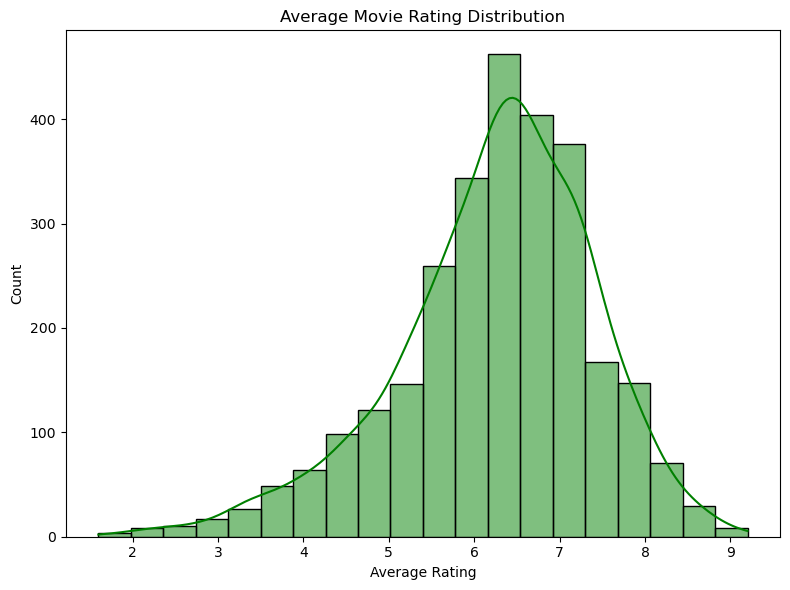

In [136]:
plt.figure(figsize = (8,6))
sns.histplot(movie_df['averagerating'], bins = 20, kde = True, color = 'green')
plt.title('Average Movie Rating Distribution')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\user\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


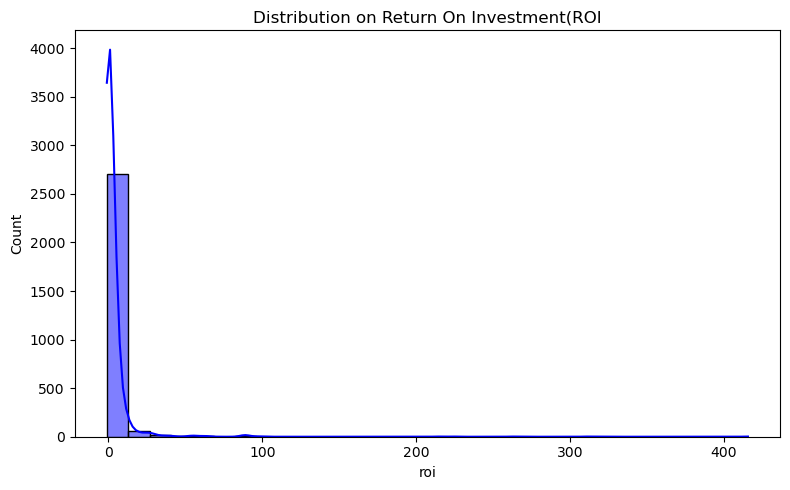

In [138]:
plt.figure(figsize = (8, 5))
sns.histplot(movie_df["roi"], bin s= 30, kde = True, color = "blue")
plt.title('Distribution on Return On Investment(ROI')
plt.tight_layout()
plt.show()

* Distribution of Runtime

C:\Users\user\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


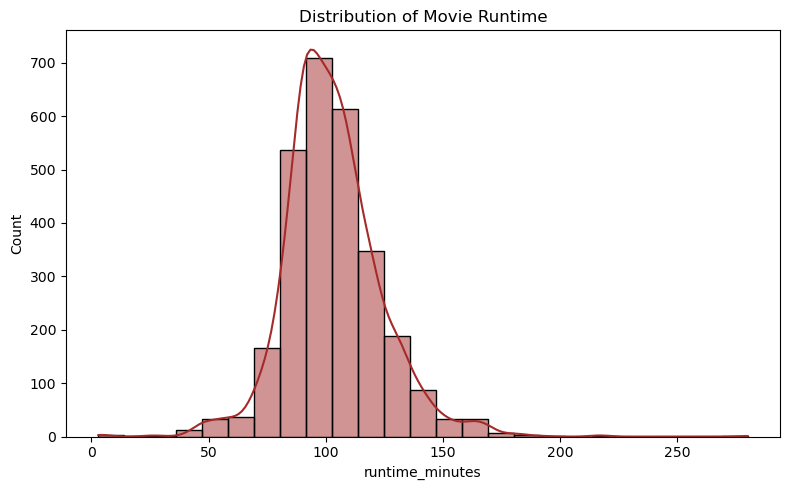

In [144]:
plt.figure(figsize = (8, 5))
sns.histplot(movie_df["runtime_minutes"], bin s= 25, kde = True, color= "brown")
plt.title("Distribution of Movie Runtime")
plt.tight_layout()
plt.show()

<h3><b><span style='font-family:Georgia'>Bivariate Analysis</span></b></h3

* Comparing Gener by Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

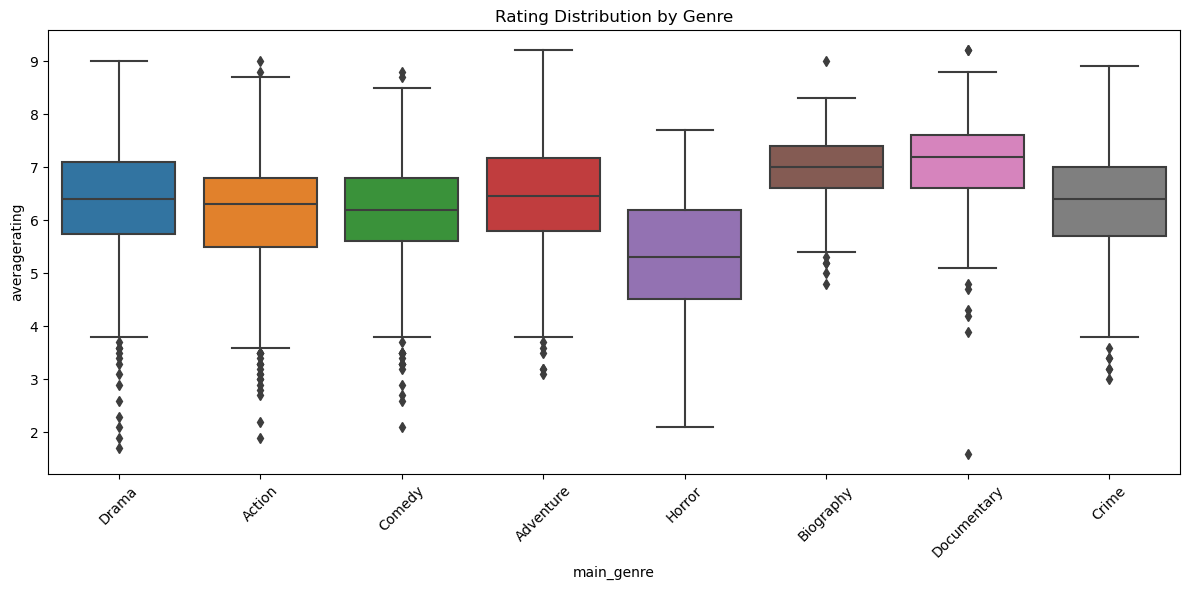

In [152]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = movie_df, x = 'main_genre', y = 'averagerating', order = movie_df["main_genre"].value_counts().index[:8])
plt.title('Rating Distribution by Genre')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

* Worldwide Gross vs Budget

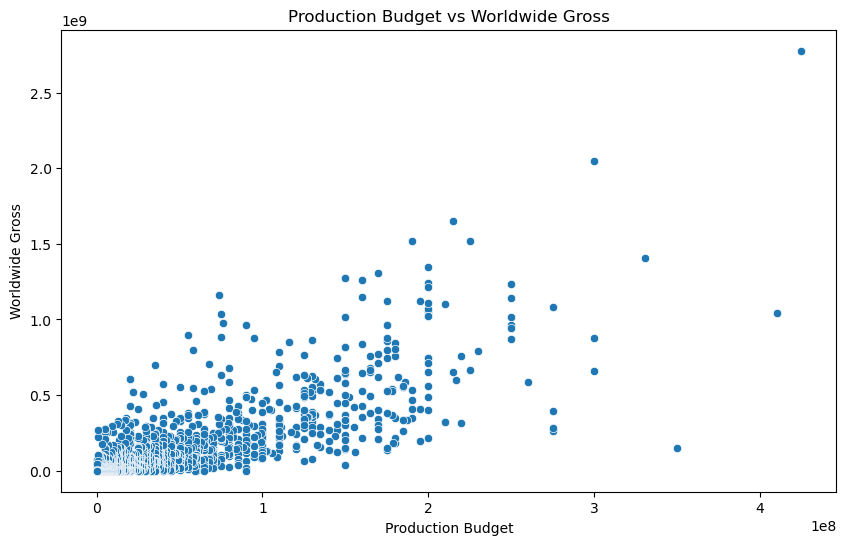

In [174]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'production_budget', y ='worldwide_gross', data = movie_df)
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

* Revenue vs Ratings

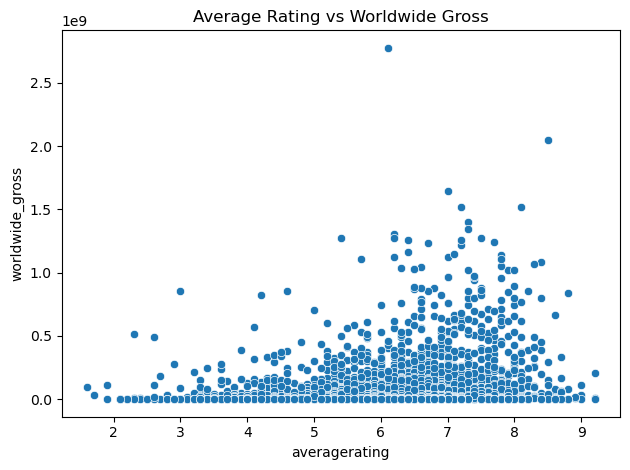

In [164]:
sns.scatterplot(data = movie_df, x = 'averagerating', y = 'worldwide_gross')
plt.title('Average Rating vs Worldwide Gross')
plt.tight_layout()
plt.show()

* Production Budget vs ROI

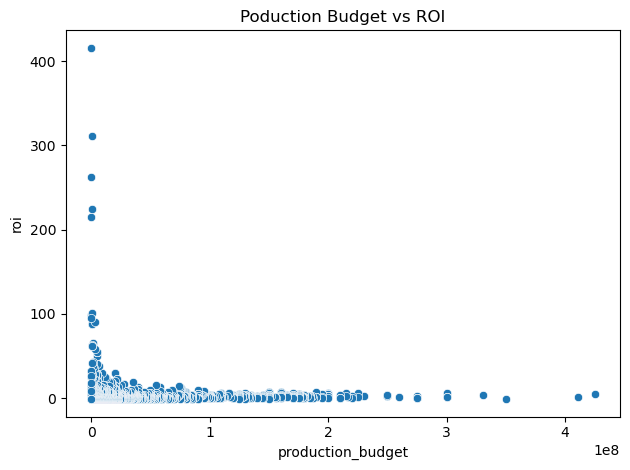

In [160]:
sns.scatterplot(data = movie_df, x = 'production_budget', y = 'roi')
plt.title('Poduction Budget vs ROI')
plt.tight_layout()
plt.show()

* Profit vs Monthly Movie Releases 

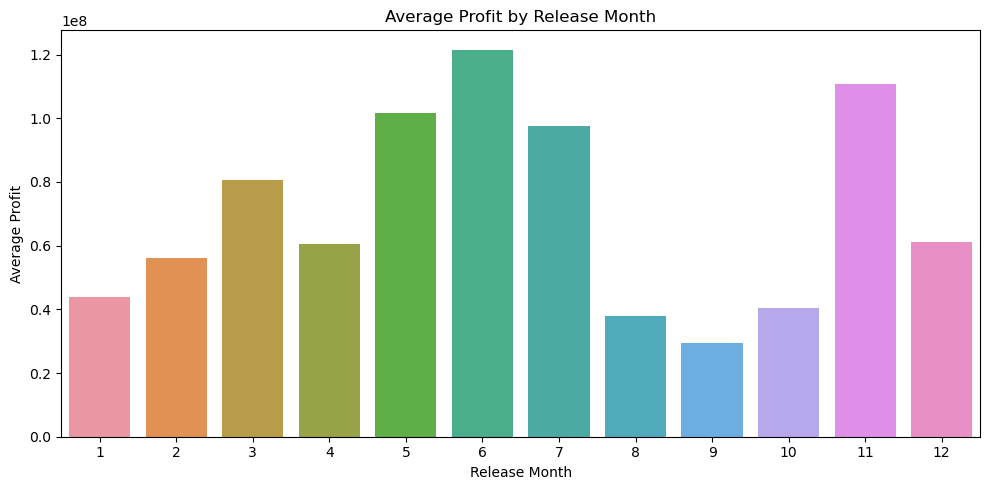

In [169]:
# Convert release_date to datetime 
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'], errors ='coerce')
# Extract the month
movie_df['release_month'] = movie_df['release_date'].dt.month
monthly_profit = movie_df.groupby('release_month')['profit'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x ='release_month', y ='profit', data = monthly_profit)
plt.title('Average Profit by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Profit')
plt.tight_layout()
plt.show()

## Evaluation

 My findings were;

- Identifying the movie genres that top the charts

- Figuring out what blend of ratings,gener and budget are profitable 

- Providing clear observations the studio can use to produce better films



## Conclusion


* Geners that are top performing like drama at 38.3%  and action at 34.2% are prone to generate more profitable income

* Movies with good ratings,gener and  a proper budget plan make are more profitable and can guarantee success

*  The type of genre and budget is crucial since it determines our profitability and can significantly boost return on investment (ROI) and guide the studio in better production decisions



* Exporting the database

In [180]:
movie_df.to_csv('movie_analysis.csv', index=False)